<a href="https://colab.research.google.com/github/MonkeyWrenchGang/PythonBootcamp/blob/main/Week_4_Real_World_Charts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Real World


---


The Ratings_and_Sentiments.csv dataset contains over 7,600 reviews of 66 coffee shops in Austin Texas, the data was initially scraped, munged and prepped by Rachel Downs (http://www.racheldowns.co) a Marketing and MIS student at UT Austin.

Your challenge is to further prepare the data (easy), and create summaries and charts answering various questions about the data (also easy)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Import Yelp Data


---



In [ ]:
# URL of the Excel file on GitHub
url = 'https://github.com/MonkeyWrenchGang/2023_BAN6005/raw/main/module_2/data/ratings_and_sentiments.xlsx'

# Read the Excel file into a Pandas DataFrame
yelp = pd.read_excel(url)
yelp.head()

,coffee_shop_name,review_text,rating,num_rating,cat_rating,bool_HIGH,overall_sent,vibe_sent,tea_sent,service_sent,seating_sent,price_sent,parking_sent,location_sent,alcohol_sent,coffee_sent,food_sent,hours_sent,internet_sent,local_sent
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the vib...,5.0 star rating,5,HIGH,1,4,3.0,0,0,0,0,0.0,0,1,3.0,0.0,0.0,0,0
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, vibe ...",4.0 star rating,4,HIGH,1,3,3.0,0,0,0,0,0.0,0,0,0.0,2.0,0.0,0,0
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in food seating ...,4.0 star rating,4,HIGH,1,2,2.0,0,0,3,0,0.0,0,0,-1.0,2.0,0.0,0,0
3,The Factory - Cafe With a Soul,11/25/2016 Very cool vibe! Good drinks Nice s...,2.0 star rating,2,LOW,0,1,0.0,0,0,-1,-1,0.0,0,0,0.0,0.0,0.0,0,0
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are location within...,4.0 star rating,4,HIGH,1,2,0.0,0,0,0,0,3.0,0,0,0.0,0.0,0.0,0,0


In [ ]:
# Split the "review_text" column by whitespace and extract the first element
yelp['date'] = yelp['review_text'].str.split().str[0]
yelp['date'].head()

0    11/25/2016
1     12/2/2016
2    11/30/2016
3    11/25/2016
4     12/3/2016
Name: date, dtype: object

# Now convert to Date


In [ ]:
# Convert the 'date' column to Pandas datetime format, specifying the format
yelp['date'] = pd.to_datetime(yelp['date'], format="%m/%d/%Y")
yelp['date'].head()

0   2016-11-25
1   2016-12-02
2   2016-11-30
3   2016-11-25
4   2016-12-03
Name: date, dtype: datetime64[ns]

## Make Some Flags

1. Create starbucks_flag if review_text contains 'starbucks'
2. Create "good_flag" if  review_text mentions the word "good"
3. Create "great_flag" if  review_text mentions the word "great"


In [ ]:
yelp['starbucks_flag'] = yelp['review_text'].str.contains('starbucks',case=False)
yelp['good_flag'] = yelp['review_text'].str.contains('good',case=False)
yelp['great_flag'] = yelp['review_text'].str.contains('great',case=False)


In [ ]:
yelp['starbucks_flag'].value_counts()

False    7296
True      320
Name: starbucks_flag, dtype: int64

## Make a Histogram of

bins = 30

|Variable  |  hue  |  
|---------- |  ----------  |
|num_rating | great_flag  |


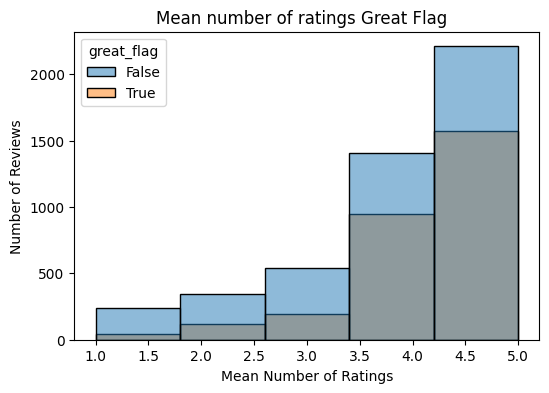

In [ ]:
plt.figure(figsize=(6, 4))

sns.histplot(data=yelp,
            x="num_rating",
            hue='great_flag',
            bins=5)
plt.title('Histogram of Num Ratings ')
plt.xlabel('Number of Ratings')
plt.ylabel('Freq')
plt.show()

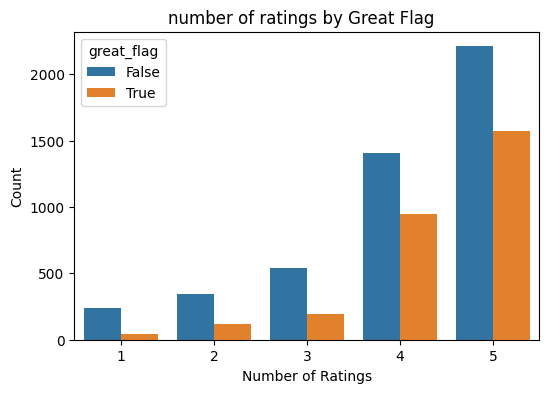

In [ ]:
plt.figure(figsize=(6, 4))

sns.countplot(data=yelp,
            x="num_rating",
            hue='great_flag',
            )
plt.title('number of ratings by Great Flag  ')
plt.xlabel('Number of Ratings')
plt.ylabel('Count')
plt.show()

## Does Service Sentiment and Great_Flag RElate?

create a boxplot


|Y |     X  |
|----| --------|
|service_sent  |  great_flag  |

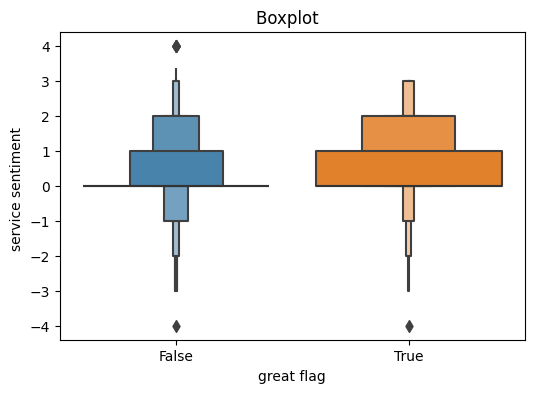

In [ ]:
plt.figure(figsize=(6, 4))

sns.boxenplot(data=yelp,
            x='great_flag',
            y="service_sent",
            )
plt.title('Boxplot  ')
plt.xlabel('great flag')
plt.ylabel('service sentiment ')
plt.show()

BoxPlots

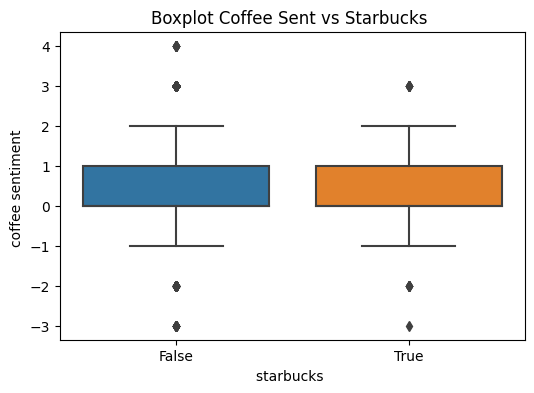

In [ ]:
plt.figure(figsize=(6, 4))

sns.boxplot(data=yelp,
            x='starbucks_flag',
            y="coffee_sent",
            )
plt.title('Boxplot Coffee Sent vs Starbucks ')
plt.xlabel('starbucks ')
plt.ylabel('coffee sentiment ')
plt.show()

BARCHART

---
defaults to mean!

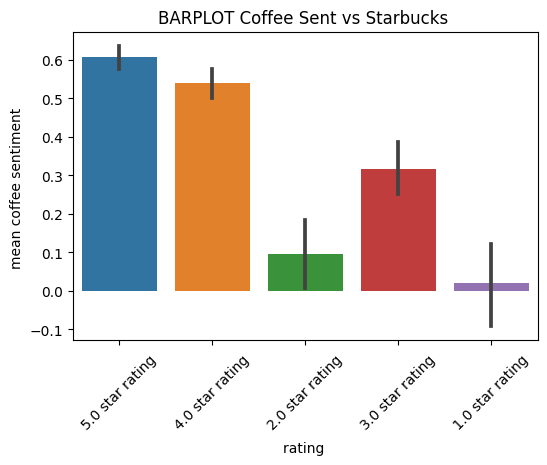

In [ ]:
plt.figure(figsize=(6, 4))

sns.barplot(data=yelp,
            x='rating',
            y="coffee_sent",
            )
plt.title('BARPLOT Coffee Sent vs Rating ')
plt.xlabel('rating ')
plt.ylabel('mean coffee sentiment ')
plt.xticks(rotation=45)
plt.show()

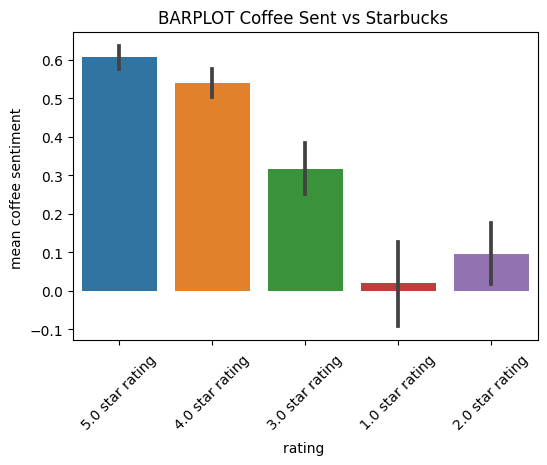

In [ ]:
# Sort the DataFrame by 'coffee_sent' in descending order
sorted_yelp = yelp.sort_values('coffee_sent', ascending=False)
plt.figure(figsize=(6, 4))

sns.barplot(data=sorted_yelp,
            x='rating',
            y="coffee_sent",
            )
plt.title('BARPLOT Coffee Sent vs Rating ')
plt.xlabel('rating ')
plt.ylabel('mean coffee sentiment ')
plt.xticks(rotation=45)
plt.show()

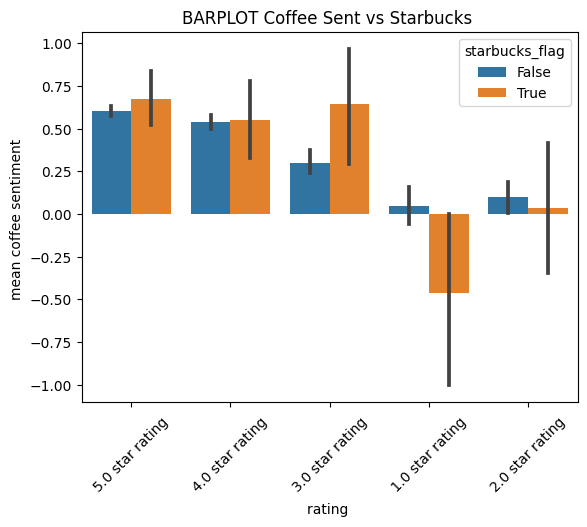

In [ ]:

sorted_yelp = yelp.sort_values('coffee_sent', ascending=False)

sns.barplot(data=sorted_yelp,
            x='rating',
            y="coffee_sent",
            hue="starbucks_flag"
            )
plt.title('BARPLOT Coffee Sent vs Starbucks ')
plt.xlabel('rating ')
plt.ylabel('mean coffee sentiment ')
plt.xticks(rotation=45)
plt.show()